In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [2]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/#20_Transfer_Learning')

In [3]:
np.random.seed(3)
tf.compat.v1.set_random_seed(3)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('./train',
                                                    target_size=(150, 150),
                                                    batch_size=5,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 fill_mode='nearest')

test_generator = test_datagen.flow_from_directory('./test',
                                                 target_size=(150, 150),
                                                 batch_size=5,
                                                 class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
transfer_model = VGG16(weights='imagenet', 
                       include_top=False, input_shape=(150,150,3))
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
finetune_model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizers.Adam(learning_rate=0.0002),
                      metrics=['accuracy'])

history = finetune_model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
32/32 [==============================] - 71s 2s/step - loss: 0.6671 - accuracy: 0.5750 - val_loss: 0.4658 - val_accuracy: 0.7917
Epoch 2/20
32/32 [==============================] - 2s 73ms/step - loss: 0.3817 - accuracy: 0.8813 - val_loss: 0.3529 - val_accuracy: 0.9083
Epoch 3/20
32/32 [==============================] - 2s 72ms/step - loss: 0.2975 - accuracy: 0.9312 - val_loss: 0.2851 - val_accuracy: 0.9000
Epoch 4/20
32/32 [==============================] - 2s 72ms/step - loss: 0.2271 - accuracy: 0.9312 - val_loss: 0.2506 - val_accuracy: 0.9000
Epoch 5/20
32/32 [==============================] - 4s 124ms/step - loss: 0.1889 - accuracy: 0.9375 - val_loss: 0.2384 - val_accuracy: 0.9083
Epoch 6/20
32/32 [==============================] - 3s 94ms/step - loss: 0.1722 - accuracy: 0.9625 - val_loss: 0.2096 - val_accuracy: 0.9333
Epoch 7/20
32/32 [==============================] - 2s 72ms/step - loss: 0.1769 - accuracy: 0.9312 - val_loss: 0.1937 - val_accuracy: 0.9250
Epoch 8/20
32

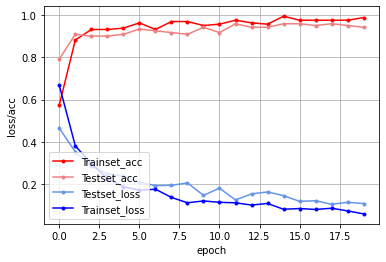

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')


plt.legend(loc='lower left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()